In [2]:
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, epochs=5, workers=3)

At its core, word2vec model parameters are stored as matrices (NumPy arrays). Each array is `#vocabulary` (controlled by the min_count parameter) times vector size (the vector_size parameter) of floats (single precision aka 4 bytes).
Three such matrices are held in RAM (work is underway to reduce that number to two, or even one). So if your input contains 100,000 unique words, and you asked for layer vector_size=200, the model will require aprox. `100,000`

In [3]:
model.wv['sentence']

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [ ]:
more_sentences = [
    ['Advanced', 'users', 'can', 'load', 'a', 'model',
    'and', 'continue', 'training', 'it', 'with', 'more', 'sentences'],
]
            

In [4]:
len(model.wv)

14

In [5]:
model.wv.most_similar('sentence')

[('yet', 0.21617238223552704),
 ('for', 0.0931011214852333),
 ('one', 0.09291722625494003),
 ('word2vec', 0.0796348825097084),
 ('second', 0.06285078078508377),
 ('another', 0.0270574688911438),
 ('more', 0.016134681180119514),
 ('the', -0.01083916611969471),
 ('final', -0.02775036171078682),
 ('first', -0.041253406554460526)]

In [7]:
model.save('models/word2vec.model')

model = Word2Vec.load('models/word2vec.model')

In [8]:
# Store just the words + their trained embeddings.

from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save('models/word2vec.wordvectors')

wv = KeyedVectors.load('models/word2vec.wordvectors')
vector = wv['sentence']
print(vector)

[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

In [ ]:
word_vectors.save_word2vec_format('models/vectors.txt', binary=False)
word_vectors.save_word2vec_format('models/vectors.bin', binary=True)

In [ ]:
model_txt = KeyedVectors.load_word2vec_format('models/vectors.txt', binary=False)
model_bin = KeyedVectors.load_word2vec_format('models/vectors.bin', binary=True)

In [9]:
import gensim.downloader
# Show all available models in gensim-data
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [10]:
# Download the "glove-twitter-25" embeddings
model_wv = gensim.downloader.load('glove-twitter-25')
#model_wv = gensim.downloader.load('word2vec-google-news-300')


[==================================================] 100.0% 104.8/104.8MB downloaded


## Similarity

In [11]:
model_wv.most_similar('twitter')

[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964965343475342),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.877821147441864),
 ('internet', 0.8753896355628967)]

In [14]:
model_wv.most_similar('obama', topn=15)

[('romney', 0.9566564559936523),
 ('president', 0.9400959610939026),
 ('barack', 0.9376798868179321),
 ('clinton', 0.9285899996757507),
 ('says', 0.9087842106819153),
 ('bill', 0.9080010056495667),
 ('claims', 0.9074634909629822),
 ('hillary', 0.888924777507782),
 ('talks', 0.8864543437957764),
 ('government', 0.8833804130554199),
 ('potus', 0.8779967427253723),
 ('gov', 0.8687574863433838),
 ('biden', 0.8659908771514893),
 ('former', 0.8633725047111511),
 ('bush', 0.8589130640029907)]

In [15]:
print(model_wv.similarity('olive', 'tree'))
print(model_wv.similarity('olive', 'animal'))
print(model_wv.similarity('olive', 'house'))
#print(model_wv.similarity('obama', 'trump'))

0.8198055
0.5063875
0.6669966


In [16]:
print(model_wv.similarity('obama', 'biden'))
print(model_wv.similarity('obama', 'trump'))

0.86599076
0.7712978


In [17]:
pairs = [
    ('car', 'minivan'),   # A minivan is a kind of car
    ('car', 'bicycle'),   # A bicycle is a kind of car
    ('car', 'airplane'),  # An airplane is a type of car
    ('car', 'cereal'),    # Cereal is not a type of car
    ('car', 'communism'), # Communism is not a type of car
    ('car', 'engine'),   # A car has an engine
    ('car', 'tree'),     # A car is not a tree
    ('car', 'book'),     # A car is not a book
    ('car', 'car'),      # A car is a car
    ('car', 'banana')    # A car is not a banana
]

for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model_wv.similarity(w1, w2)))

car 	 minivan 	 0.50
car 	 bicycle 	 0.70
car 	 airplane 	 0.73
car 	 cereal 	 0.54
car 	 communism 	 0.11
car 	 engine 	 0.68
car 	 tree 	 0.68
car 	 book 	 0.62
car 	 car 	 1.00
car 	 banana 	 0.53


In [19]:
model_wv.doesnt_match(['cat', 'dog', 'france'])
#model_wv.doesnt_match(['cat', 'dog', 'france', 'germany', 'paris'])

'france'

In [24]:
model_wv.doesnt_match(['portugal', 'france', 'russia'])

'portugal'

In [25]:
model_wv.doesnt_match(['portugal', 'france', 'russia', 'germany', 'spain'])

'france'

In [26]:
result = model_wv.most_similar(positive=['woman', 'king'], negative=['man'])
print(result[0])

('meets', 0.8841923475265503)


In [27]:
result = model_wv.most_similar(positive=['canada', 'hamburger'], negative=['usa'])
print(result[0])

('meatballs', 0.8501423001289368)


In [29]:
model_wv.most_similar('portugal', topn=15)

[('benfica', 0.8906856179237366),
 ('inter', 0.8823168277740479),
 ('barcelona', 0.8823108077049255),
 ('milan', 0.8798957467079163),
 ('bayern', 0.8668390512466431),
 ('vs', 0.8622055649757385),
 ('spain', 0.8606054186820984),
 ('juventus', 0.8564386367797852),
 ('porto', 0.8555518984794617),
 ('manchester', 0.8532636165618896),
 ('atletico', 0.8528964519500732),
 ('dortmund', 0.8508116006851196),
 ('munich', 0.8483926057815552),
 ('malaga', 0.843699038028717),
 ('borussia', 0.8435484766960144)]

In [30]:
def analogy(x2, y1, x1):
    result = model_wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [34]:
analogy('fantastic', 'bad', 'good')

'wonderful'

In [33]:
analogy('france', 'japanese', 'japan')

'french'

## Visualisation

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None, sample=0):
    
    word_vectors = np.array([model[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

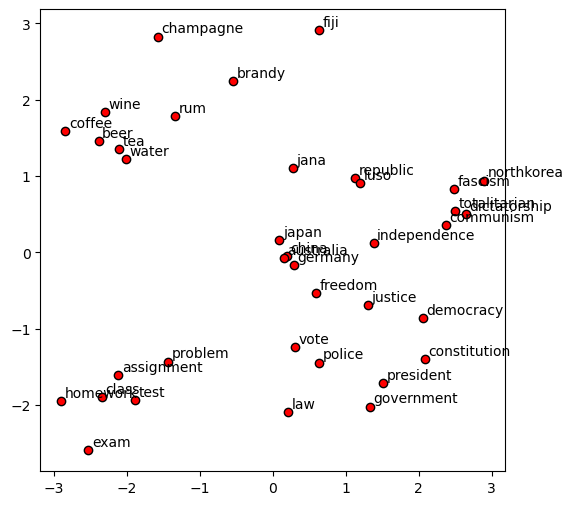

In [47]:
words = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
        'homework', 'assignment', 'problem', 'exam', 'test', 'class',
        'government', 'police', 'law', 'president', 'democracy', 'republic',
        'freedom', 'independence', 'justice', 'vote', 'constitution',
        'dictatorship', 'totalitarian', 'fascism', 'communism',
        'northkorea', 'japan', 'china', 'germany', 'australia', 'fiji',
        'luso', 'jana']
display_pca_scatterplot(model_wv, words)